In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2, random, tempfile, requests
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 確認するモデルを指定

In [4]:
model_size = ["n", "s", "m", "l", "x"][0]

### 通常の物体検出モデル
# model = YOLO(f"./models/yolov8{model_size}.pt")

### インスタンスセグメンテーションのモデル
# model = YOLO(f"./models/yolov8{model_size}-seg.pt")

### Keypoint検出（骨格検出）のモデル
# model = YOLO(f"./models/yolov8{model_size}-pose")

# 自作モデル
model = YOLO(f"./output/yolov8/20230713-1206_yolov8n_mask_yolo_dataset/weights/best.pt")

: 

### ローカルのデータセットの画像で推論を確認

{0: 'with mask', 1: 'without mask'}



0: 640x480 1 with mask, 419.7ms
Speed: 9.8ms preprocess, 419.7ms inference, 16.3ms postprocess per image at shape (1, 3, 640, 480)


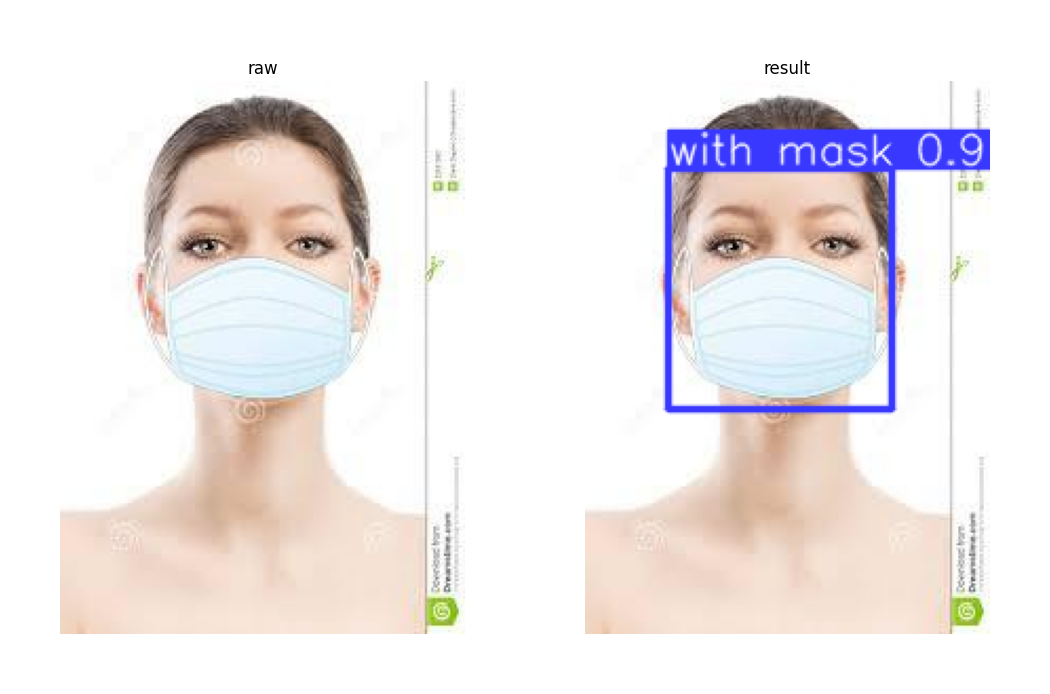

In [4]:
imgs = {}

img_dir = Path("./dataset/mask_yolo_dataset/valid/images/")
sample_imgPath = random.choice(list(img_dir.glob("*.jpg")))
imgs["raw"] = cv2.imread(str(sample_imgPath))[:,:,::-1]

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.4,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

imgs["result"] = result[0].plot()

utils.show_imgs(imgs, dpi=600, font_scale=0.2)

### Webの画像で推論を確認


0: 640x640 1 person, 34.4ms
Speed: 3.9ms preprocess, 34.4ms inference, 20.9ms postprocess per image at shape (1, 3, 640, 640)


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

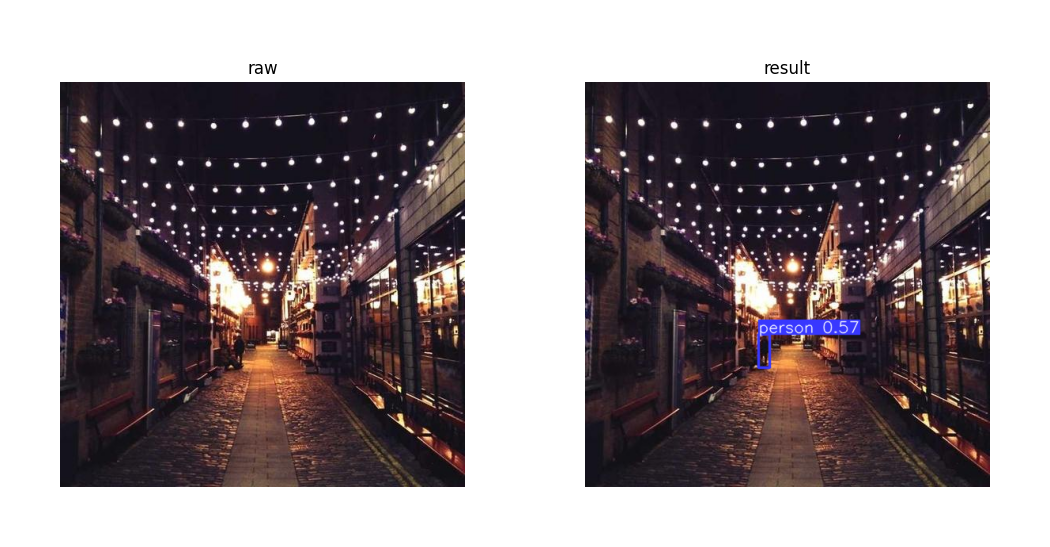

In [7]:
imgs = {}

sample_img_url = "https://picsum.photos/512"
imgs["raw"] = utils.imread_web(sample_img_url)[:, :, ::-1]

print(model.names)

result = model(
                source    = imgs["raw"],
                conf      = 0.5,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

imgs["result"] = result[0].plot()

utils.show_imgs(imgs, dpi=600, font_scale=0.2)

### カメラで確認

In [7]:
import cv2
import IPython
from PIL import Image
from io import BytesIO

model = YOLO(f"./output/yolov8/20230713-1206_yolov8n_mask_yolo_dataset/weights/best.pt")

cap = cv2.VideoCapture(0)
assert cap.isOpened(), 'Could not open video device'

try:
    while(True):
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            result = model(
                source    = imgs["raw"],
                conf      = 0.5,
                iou       = 0.001,
                save      = False,
                max_det   = 300,
                augment   = True,
                classes   = None, # [1, 2, 3],
            )

            f = BytesIO()
            Image.fromarray(result[0].plot()).save(f, "jpeg")
            IPython.display.display(IPython.display.Image(data=f.getvalue()))
            
            IPython.display.clear_output(wait=True)

except KeyboardInterrupt:
    cap.release()
    print('Stream stopped')


Stream stopped
